In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None) # show all columns

In [2]:
# Read the data
craiglist_df = pd.read_csv('./craigslist_vehicles.csv')

In [3]:
# check
craiglist_df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,NaN,fwd,NaN,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [4]:
craiglist_df.tail()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
426875,303849,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,2009.0,NaN,saab 9-7x,fair,6 cylinders,gas,106000.0,clean,automatic,NaN,4wd,mid-size,SUV,grey,https://images.craigslist.org/00b0b_dsIhheG86S...,For sale: 2009 Saab 9-7x Fair condition AWD ...,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,2011.0,ford,f-450,good,NaN,gas,177886.0,clean,automatic,NaN,NaN,NaN,bus,red,https://images.craigslist.org/00b0b_8lBfNkZ6pr...,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",NaN,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,2016.0,chevrolet,silverado,excellent,8 cylinders,other,78850.0,clean,automatic,NaN,4wd,full-size,truck,blue,https://images.craigslist.org/00k0k_jw0Pda6LTk...,2013 Silverado excellent condition. Blue in co...,NaN,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,6,1986.0,NaN,camaro iroc z28,good,NaN,gas,86500.0,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00Y0Y_avlrYDn7OY...,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00
426879,303836,7308192431,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,9795,1999.0,dodge,durango,like new,8 cylinders,gas,74000.0,clean,automatic,NaN,4wd,full-size,SUV,silver,https://images.craigslist.org/00J0J_fbgDQsCgfB...,"FOR SALE LIKE NEW 1999 DODGE DURANGO, LOADED W...",NaN,oh,39.998337,-82.022885,2021-04-17 00:00:00+00:00,2021-05-09 00:00:00+00:00


### Some Exploration

In [5]:
craiglist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [6]:
craiglist_df.describe(include='all')

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
count,426880.000000,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812,426812
unique,NaN,NaN,426880,404,413,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,NaN,51,NaN,NaN,32,88
top,NaN,NaN,https://abilene.craigslist.org/ctd/d/abilene-2...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-05-04 00:00:00+00:00,2021-05-09 00:00:00+00:00
freq,NaN,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,34294,13594
mean,213439.500000,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN,NaN
std,123229.785793,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN,NaN
min,0.000000,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN,NaN
25%,106719.750000,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN,NaN
50%,213439.500000,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN,NaN
75%,320159.250000,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN,NaN


### Some data cleaning

In [7]:
craiglist_df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

The following columns will be dropped: 

- `Unnamed: 0`: An imported index column. But since pandas creates a new index column it won't be needed
- `url`: A url link. Since our analysis will be focused more on aggregations, this won't be needed
- `region_url`: A url link. Since our analysis will be focused more on aggregations, this won't be needed
- `image_url`: A url link. Since our analysis will be focused more on aggregations, this won't be needed
- `county`: All rows of this column are null

In [8]:
# remove some columns irrelevant the analysis
clean_df = craiglist_df[['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
                         'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
                        'paint_color', 'description', 'state', 'lat', 'long', 'posting_date',
                         'removal_date']]

In [9]:
# convert the posting_date and removal_date to timestamp objects
clean_df[['posting_date', 'removal_date']] = clean_df[['posting_date', 'removal_date']].apply(pd.to_datetime)

# convert the timestamps to date
clean_df[['posting_date', 'removal_date']] = clean_df[['posting_date', 'removal_date']].apply(lambda x: x.dt.date)
#check
clean_df.info()

/var/folders/s8/332c_kl16bsfxcsm7y2qf6r80000gn/T/ipykernel_59115/3996425453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[['posting_date', 'removal_date']] = clean_df[['posting_date', 'removal_date']].apply(pd.to_datetime)
/var/folders/s8/332c_kl16bsfxcsm7y2qf6r80000gn/T/ipykernel_59115/3996425453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[['posting_date', 'removal_date']] = clean_df[['posting_date', 'removal_date']].apply(lambda x: x.dt.date)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  description   426810 non-null  object 
 18  stat

In [10]:
#check
clean_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date,removal_date
0,7307679724,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-04-16,2021-05-02
1,7311833696,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-04-24,2021-04-28
2,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,NaN,fwd,NaN,sedan,silver,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,32.453848,-99.787900,2021-04-23,2021-05-25
3,7307680715,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,32.401556,-99.884713,2021-04-16,2021-04-26
4,7311834578,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,32.401556,-99.884713,2021-04-24,2021-05-12


### Top 5 Regions with most vehicle listings

In [11]:
regions_with_most_listings = (clean_df
 .groupby('region')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=False)
 .head(5)
)

### Top 5 regions with least vehicle listings

In [12]:
regions_with_least_listings = (clean_df
 .groupby('region')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=True)
 .head(5)
)

### Top 5 states with most vehicle listings

In [13]:
state_with_most_listings = (clean_df
 .groupby('state')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=False)
 .head(5)
)

### Top 5 State with least vehicle listings

In [14]:
state_with_least_listings = (clean_df
 .groupby('state')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=True)
 .head(5)
)

### Top 5 Manufacturers with most vehicle listings

In [15]:
manufacturer_with_most_listings = (clean_df
 .groupby('manufacturer')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=False)
 .head(5)
)

### Top 5 Manufacturers with least vehicle listings

In [16]:
manufacturer_with_least_listings = (clean_df
 .groupby('manufacturer')
 .agg({'id':'count'})
 .rename(columns={'id':'num_vehicles'})
 .sort_values(['num_vehicles'], ascending=True)
 .head(5)
)

### Chart of All Time Vehicle Listing Performance by Region, State and Manufacturer

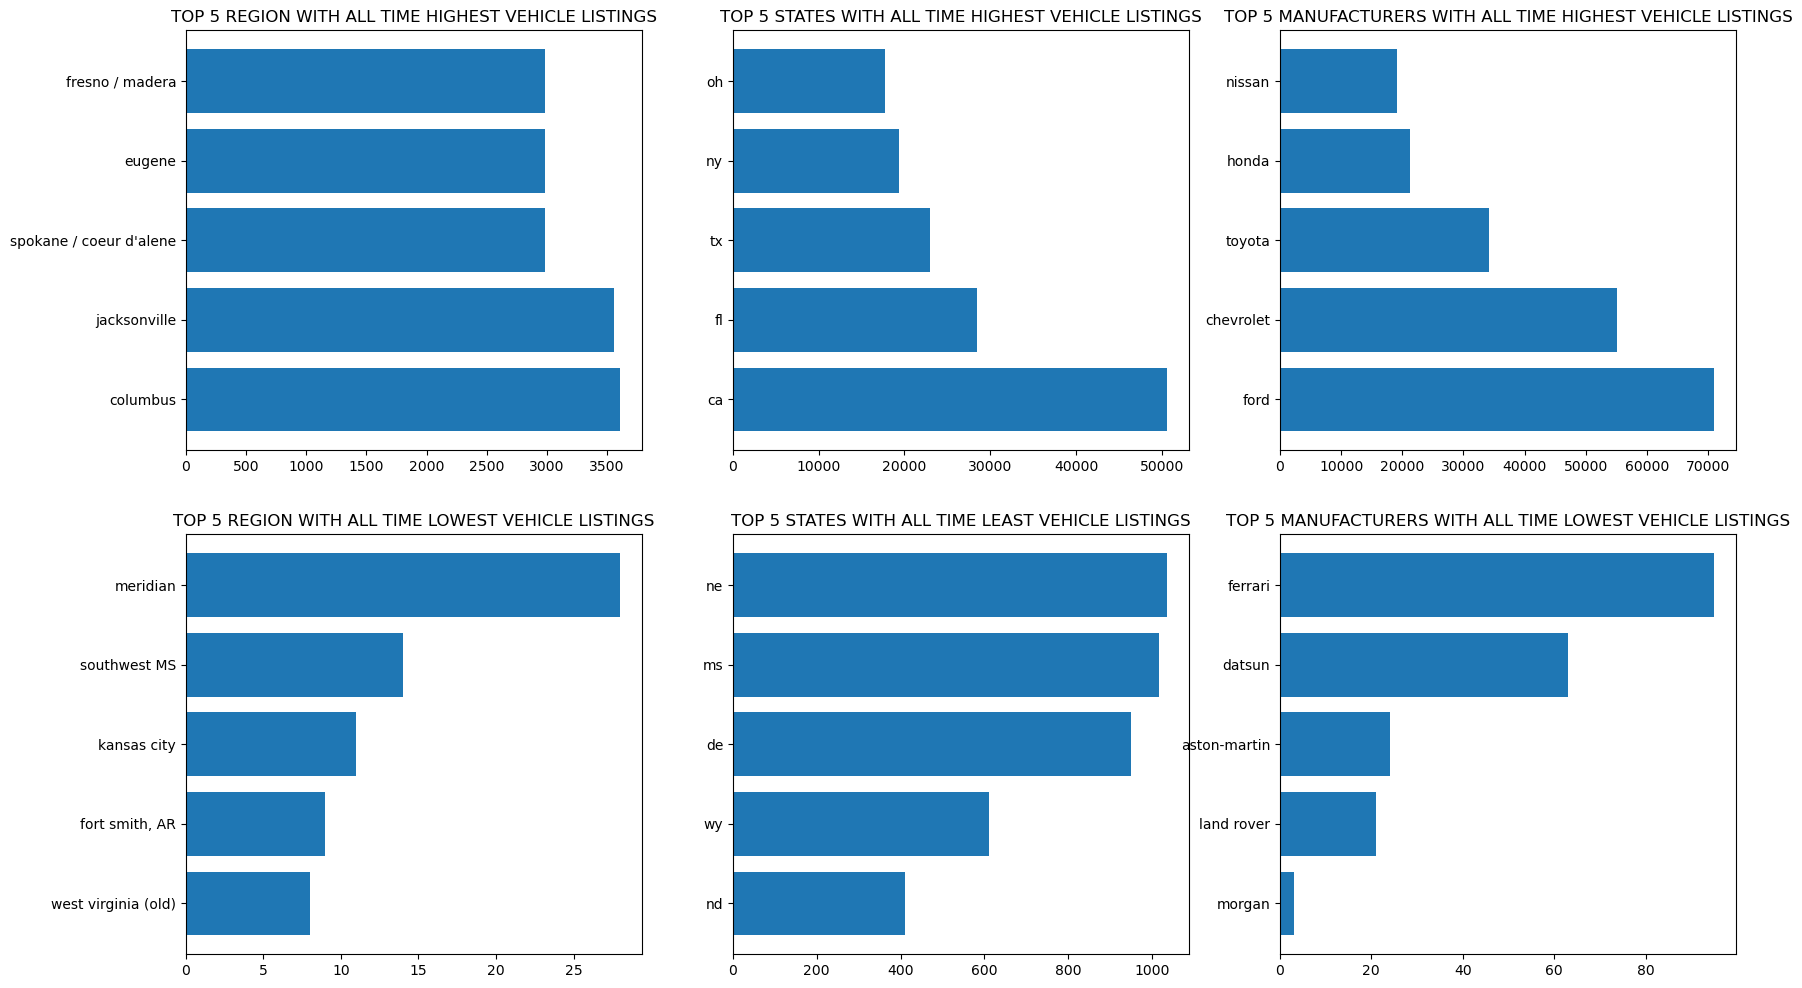

In [17]:
figure, axis = plt.subplots(2, 3, figsize=(20, 12)) 

axis[0, 0].barh(width=regions_with_most_listings['num_vehicles'], y=regions_with_most_listings.index) 
axis[0, 0].set_title("Top 5 Region with All time highest vehicle listings".upper()) 

axis[1, 0].barh(width=regions_with_least_listings['num_vehicles'], y=regions_with_least_listings.index) 
axis[1, 0].set_title("Top 5 Region with All time lowest vehicle listings".upper()) 

axis[0, 1].barh(width=state_with_most_listings['num_vehicles'], y=state_with_most_listings.index) 
axis[0, 1].set_title("Top 5 States with All time highest vehicle listings".upper()) 

axis[1, 1].barh(width=state_with_least_listings['num_vehicles'], y=state_with_least_listings.index) 
axis[1, 1].set_title("Top 5 States with All time least vehicle listings".upper()) 

axis[0, 2].barh(width=manufacturer_with_most_listings['num_vehicles'], y=manufacturer_with_most_listings.index) 
axis[0, 2].set_title("Top 5 Manufacturers with All time highest vehicle listings".upper()) 

axis[1, 2].barh(width=manufacturer_with_least_listings['num_vehicles'], y=manufacturer_with_least_listings.index) 
axis[1, 2].set_title("Top 5 Manufacturers with All time lowest vehicle listings".upper()) 
plt.show()

The above charts give insight to the all time performance of regions, states and manufacturers with regards to vehicle listings.

From the chart, it evident that `west virginia (old)` region has had the least vehicle listings ever while `columbus` region recorded the most vehicle listings. Also evident in the charts is `ca` recording the most vehicle listings ever accross all the states while `nd` has had the least vehicle listings ever comparatively. Finally, we also see from the chart that `ford` vehicles have had the most listings ever whereas `morgan` has had the least, with merely 3 listings accross board.

### Top 5 Region, State and Manufacturer Performance over time

The following analysis and chart shows performance overtime with regards to the top 5 regions, states and manufacturers. 

In [18]:
top_5_regions = regions_with_most_listings.index.tolist()
top_5_states = state_with_most_listings.index.tolist()
top_5_manufacturers = manufacturer_with_most_listings.index.tolist()

In [19]:
top_5_regions_over_time = (clean_df[clean_df['region']
                                    .isin(top_5_regions)]
                           .pivot_table('id', index='posting_date', columns='region', aggfunc='count', fill_value=0)
)

In [20]:
top_5_states_over_time = (clean_df[clean_df['state']
                                    .isin(top_5_states)]
                           .pivot_table('id', index='posting_date', columns='state', aggfunc='count', fill_value=0)
)

In [21]:
top_5_manufacturers_over_time = (clean_df[clean_df['manufacturer']
                                          .isin(top_5_manufacturers)]
                                 .pivot_table('id', index='posting_date', columns='manufacturer', aggfunc='count', fill_value=0)
)

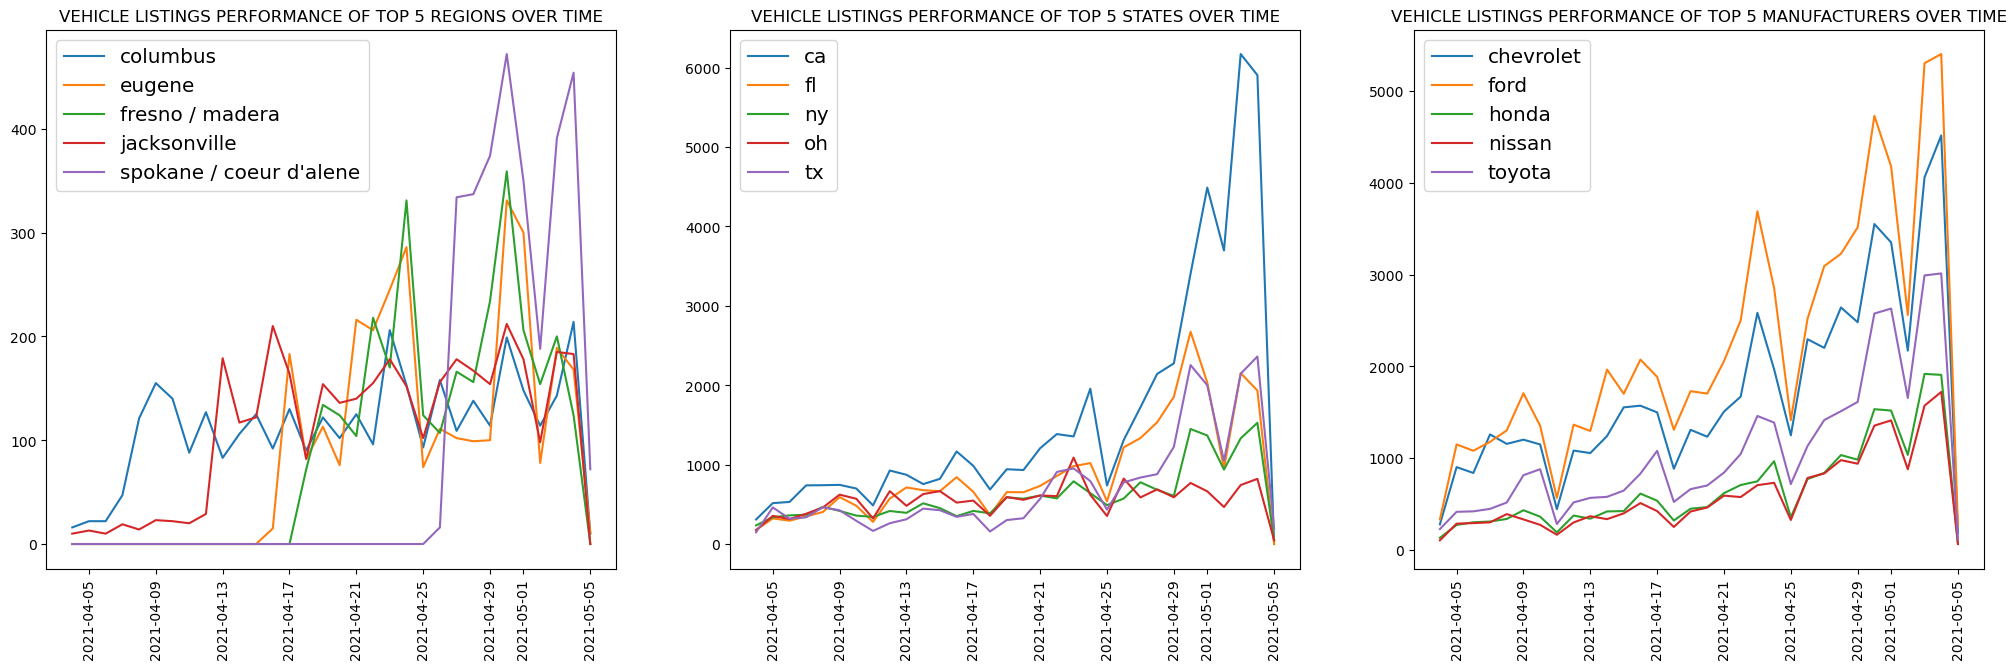

In [22]:
figure_2, axis_2 = plt.subplots(1, 3, figsize=(25, 7)) 

axis_2[0].plot(top_5_regions_over_time) 
axis_2[0].set_title("Vehicle listings performance of Top 5 Regions over time".upper()) 
axis_2[0].tick_params(axis='x', labelrotation=90, which='major')
axis_2[0].legend(labels=top_5_regions_over_time, loc="upper left", fontsize="x-large")

axis_2[1].plot(top_5_states_over_time) 
axis_2[1].set_title("Vehicle listings performance of Top 5 States over time".upper()) 
axis_2[1].tick_params(axis='x', labelrotation=90, which='major')
axis_2[1].legend(labels=top_5_states_over_time, loc="upper left", fontsize="x-large")

axis_2[2].plot(top_5_manufacturers_over_time) 
axis_2[2].set_title("Vehicle listings performance of Top 5 Manufacturers over time".upper()) 
axis_2[2].tick_params(axis='x', labelrotation=90, which='major')
axis_2[2].legend(labels=top_5_manufacturers_over_time, loc="upper left", fontsize="x-large")
plt.show()

### Vehicle listings performance over time

For the top 5 regions we have identified to record the most vehicle listings of all time, we proceeded to have a fine-grained view of how they have performed over time. From the above charts we can see that although `spokane / coeur d'alene` recorded zero listings between *5th to 25th of April 2021*, the region had a very steep rise in the days that followed, recording an all time high of over 400 listings twice in less than 10 days. Other states had an alomost uniform amount of listings overtime, averaging around 100-200 vehicle listings overtime

The performance of states overtime reflects a fairly average number of vehicle listngs overtime for the top 5 states with all time listings except for `ca` which had a very steep rise in the amount of listings between *27th of April 2021 and 4th of May 2021*, recording an all time high of over 6,000 listings between *1st to 3rd of May 2021*

The top 5 manufacturers performance overtime, show `ford` to be the leading manufacturer of listed vehicles overtime, recording an all time high of over 5,000 listings between *2nd to 4th of May 2021*

Overall, the charts shows a steady improvement in the number of vehicles listed overtime across states, regions and manufacturers

### Average vehicle listing price by region, state, manufacturer

The following analysis shows the average listing price of vehicle for each region, state and manufacturer. The top 5 regions, states and manufacturers with the highest average vehicle price is plotted in the bar chart

### Top 5 Regions with highest average vehicle price listings

In [23]:
regions_with_highest_avg_price = (clean_df
                                         .groupby('region')
                                         .agg({'price':'mean'})
                                         .rename(columns={'price':'avg_price'})
                                         .round(3)
                                         .sort_values(['avg_price'], ascending=False)
                                         .head(5)
                                        )

### Top 5 Regions with least average vehicle price listings

In [24]:
regions_with_least_avg_price = (clean_df
                                         .groupby('region')
                                         .agg({'price':'mean'})
                                         .rename(columns={'price':'avg_price'})
                                         .round(3)
                                         .sort_values(['avg_price'], ascending=True)
                                         .head(5)
                                        )

### Top 5 states with highest average vehicle price listings

In [25]:
states_with_highest_avg_price = (clean_df
                                         .groupby('state')
                                         .agg({'price':'mean'})
                                         .rename(columns={'price':'avg_price'})
                                         .round(3)
                                         .sort_values(['avg_price'], ascending=False)
                                         .head(5)
                                        )

### Top 5 states with least average vehicle price listings

In [26]:
states_with_least_avg_price = (clean_df
                                         .groupby('state')
                                         .agg({'price':'mean'})
                                         .rename(columns={'price':'avg_price'})
                                         .round(3)
                                         .sort_values(['avg_price'], ascending=True)
                                         .head(5)
                                        )

### Top 5 Manufacturers with highest average vehicle price listings

In [27]:
manufacturers_with_highest_avg_price = (clean_df
                                             .groupby('manufacturer')
                                             .agg({'price':'mean'})
                                             .rename(columns={'price':'avg_price'})
                                             .round(3)
                                             .sort_values(['avg_price'], ascending=False)
                                             .head(5)
                                            )

### Top 5 Manufacturers with least average vehicle price listings

In [28]:
manufacturers_with_least_avg_price = (clean_df
                                             .groupby('manufacturer')
                                             .agg({'price':'mean'})
                                             .rename(columns={'price':'avg_price'})
                                             .round(3)
                                             .sort_values(['avg_price'], ascending=True)
                                             .head(5)
                                            )

### Average Vehicle Price Listings by Regions, States and Manufacturers

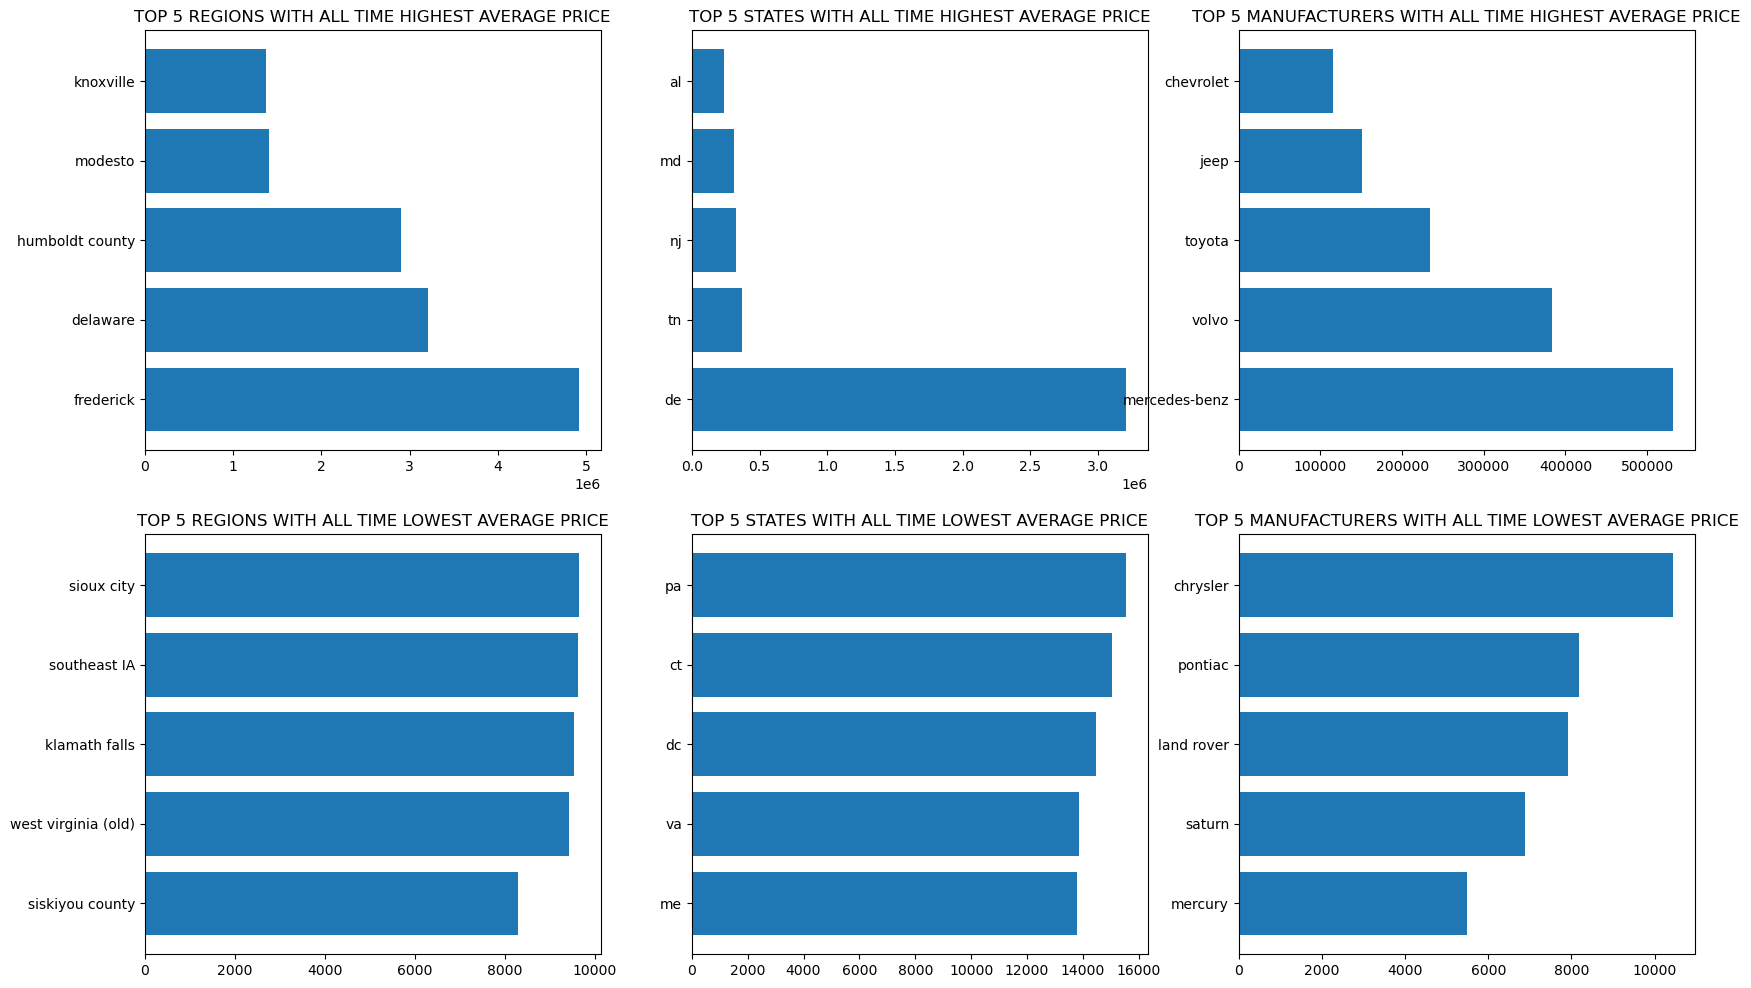

In [29]:
figure_3, axis_3 = plt.subplots(2, 3, figsize=(20, 12)) 

axis_3[0, 0].barh(width=regions_with_highest_avg_price['avg_price'], y=regions_with_highest_avg_price.index) 
axis_3[0, 0].set_title("Top 5 Regions with all time highest average price".upper()) 

axis_3[1, 0].barh(width=regions_with_least_avg_price['avg_price'], y=regions_with_least_avg_price.index) 
axis_3[1, 0].set_title("Top 5 Regions with all time lowest average price".upper()) 

axis_3[0, 1].barh(width=states_with_highest_avg_price['avg_price'], y=states_with_highest_avg_price.index) 
axis_3[0, 1].set_title("Top 5 States with All time highest average price".upper()) 

axis_3[1, 1].barh(width=states_with_least_avg_price['avg_price'], y=states_with_least_avg_price.index) 
axis_3[1, 1].set_title("Top 5 States with All time lowest average price".upper()) 

axis_3[0, 2].barh(width=manufacturers_with_highest_avg_price['avg_price'], y=manufacturers_with_highest_avg_price.index) 
axis_3[0, 2].set_title("Top 5 Manufacturers with All time highest Average Price".upper()) 

axis_3[1, 2].barh(width=manufacturers_with_least_avg_price['avg_price'], y=manufacturers_with_least_avg_price.index) 
axis_3[1, 2].set_title("Top 5 Manufacturers with All time lowest average price".upper()) 
plt.show()

The above charts display the average prices of listed vehicles across regions, states and manufacturers. 

From the charts we can see that `fredrick` region has the highest average price of vehicles listed. Vehicles in this region listed for an average price of `4914334.205` while `siskiyou county` has the least vehicle price on the average with vehicles in this region averaging about `8293.855`.  
With regards to prices across states, `de` has the highest average price of `3205055.885` while vehicles sold in `me` state averaged `13782.824` making it the state where listed vehicles had the lowest prices of all time.  
For manufacturers prices, `mercedes-benz` recorded the highest average price over time recording about `531710.557` in average price of mercedez-benz vehicles listed. `mercury` vehicles has the least prices on the average, selling for about `5482.536` on the average.

### Median Vehicle Odometer Readings by region, state, manufacturer

The following analysis shows the median odometer readings of listed vehicles for each region, state and manufacturer.

### Top 5 Regions with highest Median Odometer readings

In [30]:
regions_with_highest_odometer = (clean_df
                                         .groupby('region')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=False)
                                         .head(5)
                                        )

### Top 5 Regions with least Median Odometer Readings

In [31]:
regions_with_least_odometer = (clean_df
                                         .groupby('region')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=True)
                                         .head(5)
                                        )

### Top 5 States with highest Median Odometer Readings

In [32]:
states_with_highest_odometer = (clean_df
                                         .groupby('state')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=False)
                                         .head(5)
                                        )

### Top 5 States with least Median Odometer Readings

In [33]:
states_with_least_odometer = (clean_df
                                         .groupby('state')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=True)
                                         .head(5)
                                        )

### Top 5 Manufacturers with highest Median Odometer Readings

In [34]:
manufacturers_with_highest_odometer = (clean_df
                                         .groupby('manufacturer')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=False)
                                         .head(5)
                                        )

### Top 5 Manufacturers with least Median Odometer Readings

In [35]:
manufacturers_with_least_odometer = (clean_df
                                         .groupby('manufacturer')
                                         .agg({'odometer':'median'})
                                         .rename(columns={'odometer':'median_odometer'})
                                         .round(3)
                                         .sort_values(['median_odometer'], ascending=True)
                                         .head(5)
                                        )

### Median Vehicle Odometer Readings by Regions, States and Manufacturers

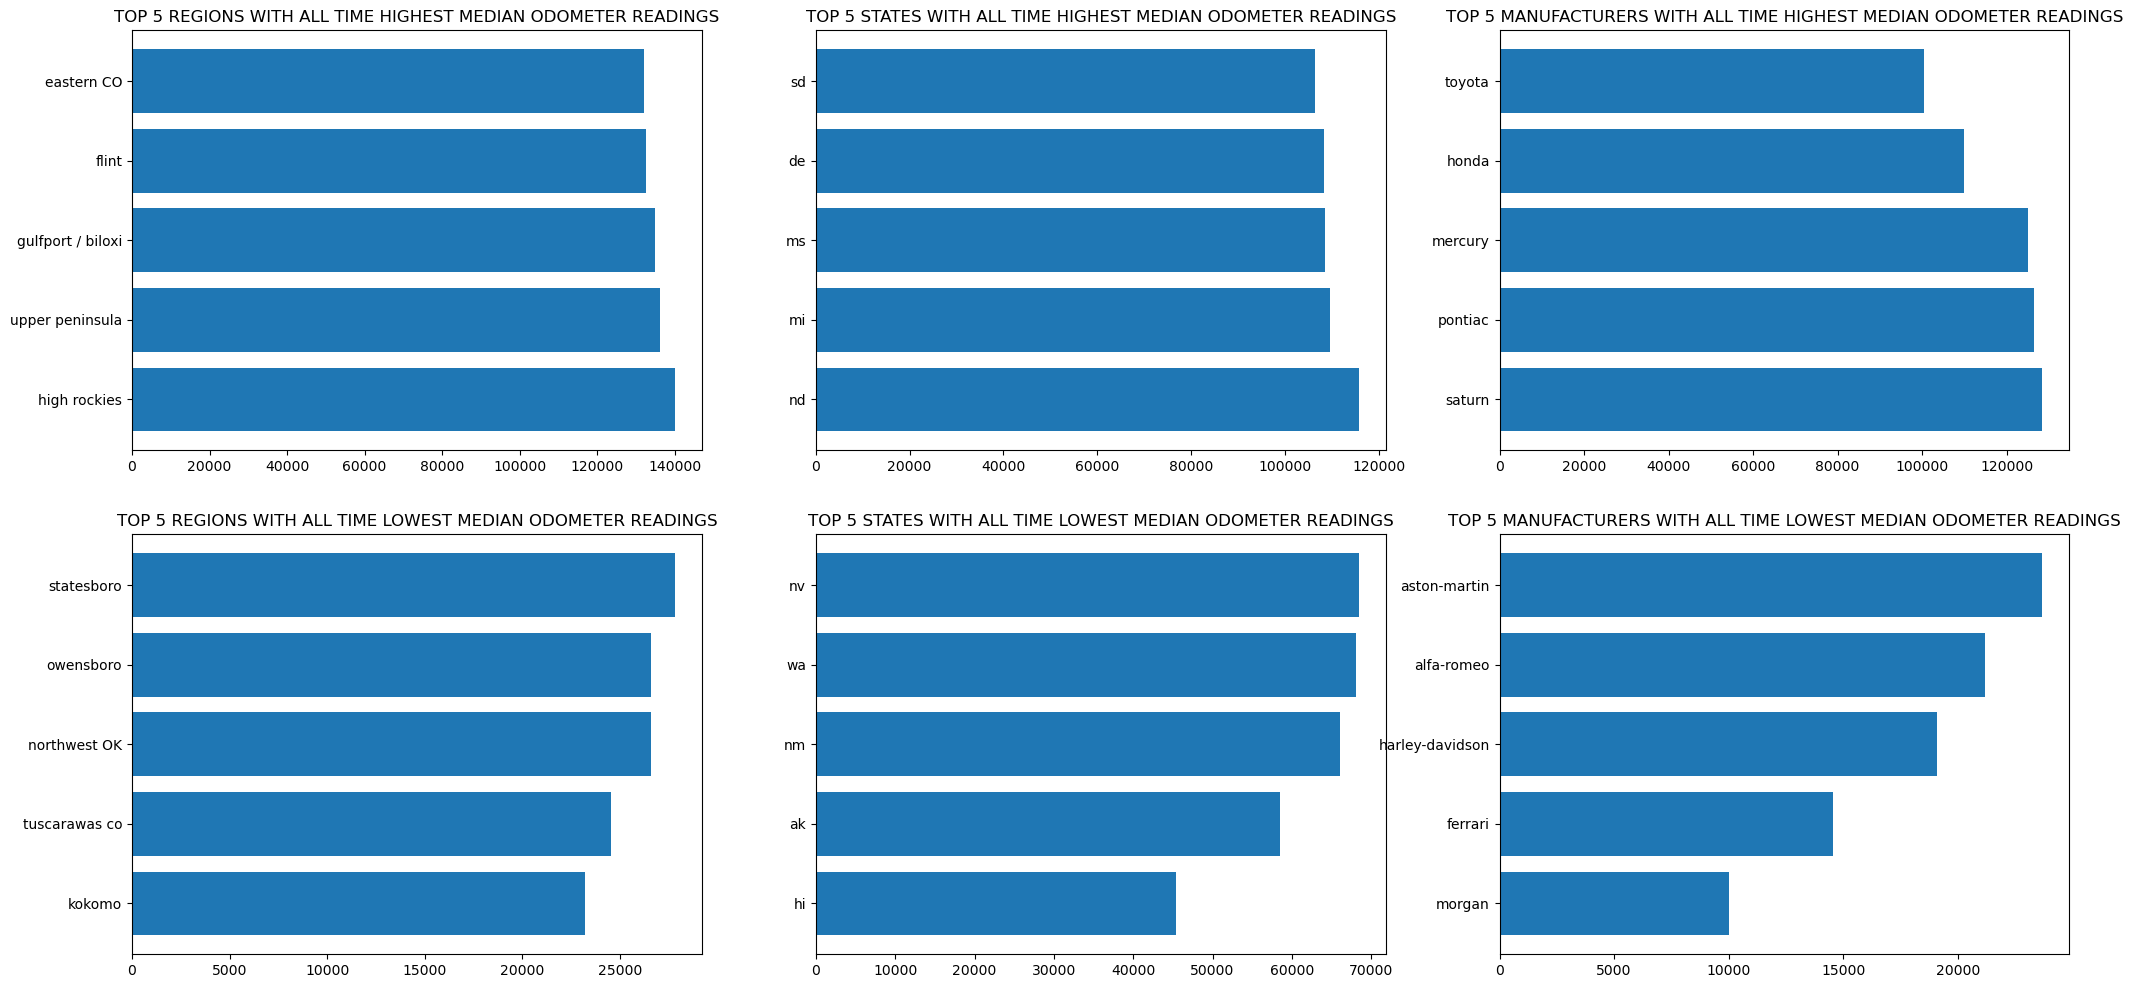

In [36]:
figure_4, axis_4 = plt.subplots(2, 3, figsize=(25, 12)) 

axis_4[0, 0].barh(width=regions_with_highest_odometer['median_odometer'], y=regions_with_highest_odometer.index) 
axis_4[0, 0].set_title("Top 5 Regions with all time highest median odometer readings".upper()) 

axis_4[1, 0].barh(width=regions_with_least_odometer['median_odometer'], y=regions_with_least_odometer.index) 
axis_4[1, 0].set_title("Top 5 Regions with all time lowest median odometer readings".upper()) 

axis_4[0, 1].barh(width=states_with_highest_odometer['median_odometer'], y=states_with_highest_odometer.index) 
axis_4[0, 1].set_title("Top 5 States with All time highest median odometer readings".upper()) 

axis_4[1, 1].barh(width=states_with_least_odometer['median_odometer'], y=states_with_least_odometer.index) 
axis_4[1, 1].set_title("Top 5 States with All time lowest median odometer readings".upper()) 

axis_4[0, 2].barh(width=manufacturers_with_highest_odometer['median_odometer'], y=manufacturers_with_highest_odometer.index) 
axis_4[0, 2].set_title("Top 5 Manufacturers with All time highest median odometer readings".upper()) 

axis_4[1, 2].barh(width=manufacturers_with_least_odometer['median_odometer'], y=manufacturers_with_least_odometer.index) 
axis_4[1, 2].set_title("Top 5 Manufacturers with All time lowest median odometer readings".upper()) 
plt.show()

The above charts display the median odometer readings of listed vehicles across regions, states and manufacturers. 

From the charts we can see that `high rockies` region has the highest median odometer of vehicles listed. Vehicles in this region have an average odometer of `140000.0` while `kokomo` region has the least median vehicle odometer readings with about `23214.5`.  
With regards to median odometer readings across states, `nd` has the highest median reading of `115701.5` while vehicles listed in `hi` state had a median reading of `45430.5` making it the state where listed vehicles had the lowest odometer readings of all time.  
For manufacturers odometer readings, `saturn` recorded the highest median odometer over time recording about `128452.0` while `morgan` vehicles has the lowest median odometer reading, of about `10000.0`.

### Daily Performances over time

The below analysis and charts shows the price performance of vehicles listed over time

In [37]:
total_price_overtime = (clean_df
 .groupby('posting_date')
 .agg({'price':'sum'})
 .rename(columns={'price':'total_price'})
 .sort_values(['posting_date'], ascending=True)
)

In [38]:
avg_price_overtime = (clean_df
 .groupby('posting_date')
 .agg({'price':'mean'})
 .rename(columns={'price':'avg_price'})
 .sort_values(['posting_date'], ascending=True)
)

In [39]:
max_price_overtime = (clean_df
 .groupby('posting_date')
 .agg({'price':'max'})
 .rename(columns={'price':'max_price'})
 .sort_values(['posting_date'], ascending=True)
)

In [40]:
median_price_overtime = (clean_df
 .groupby('posting_date')
 .agg({'price':'median'})
 .rename(columns={'price':'median_price'})
 .sort_values(['posting_date'], ascending=True)
)

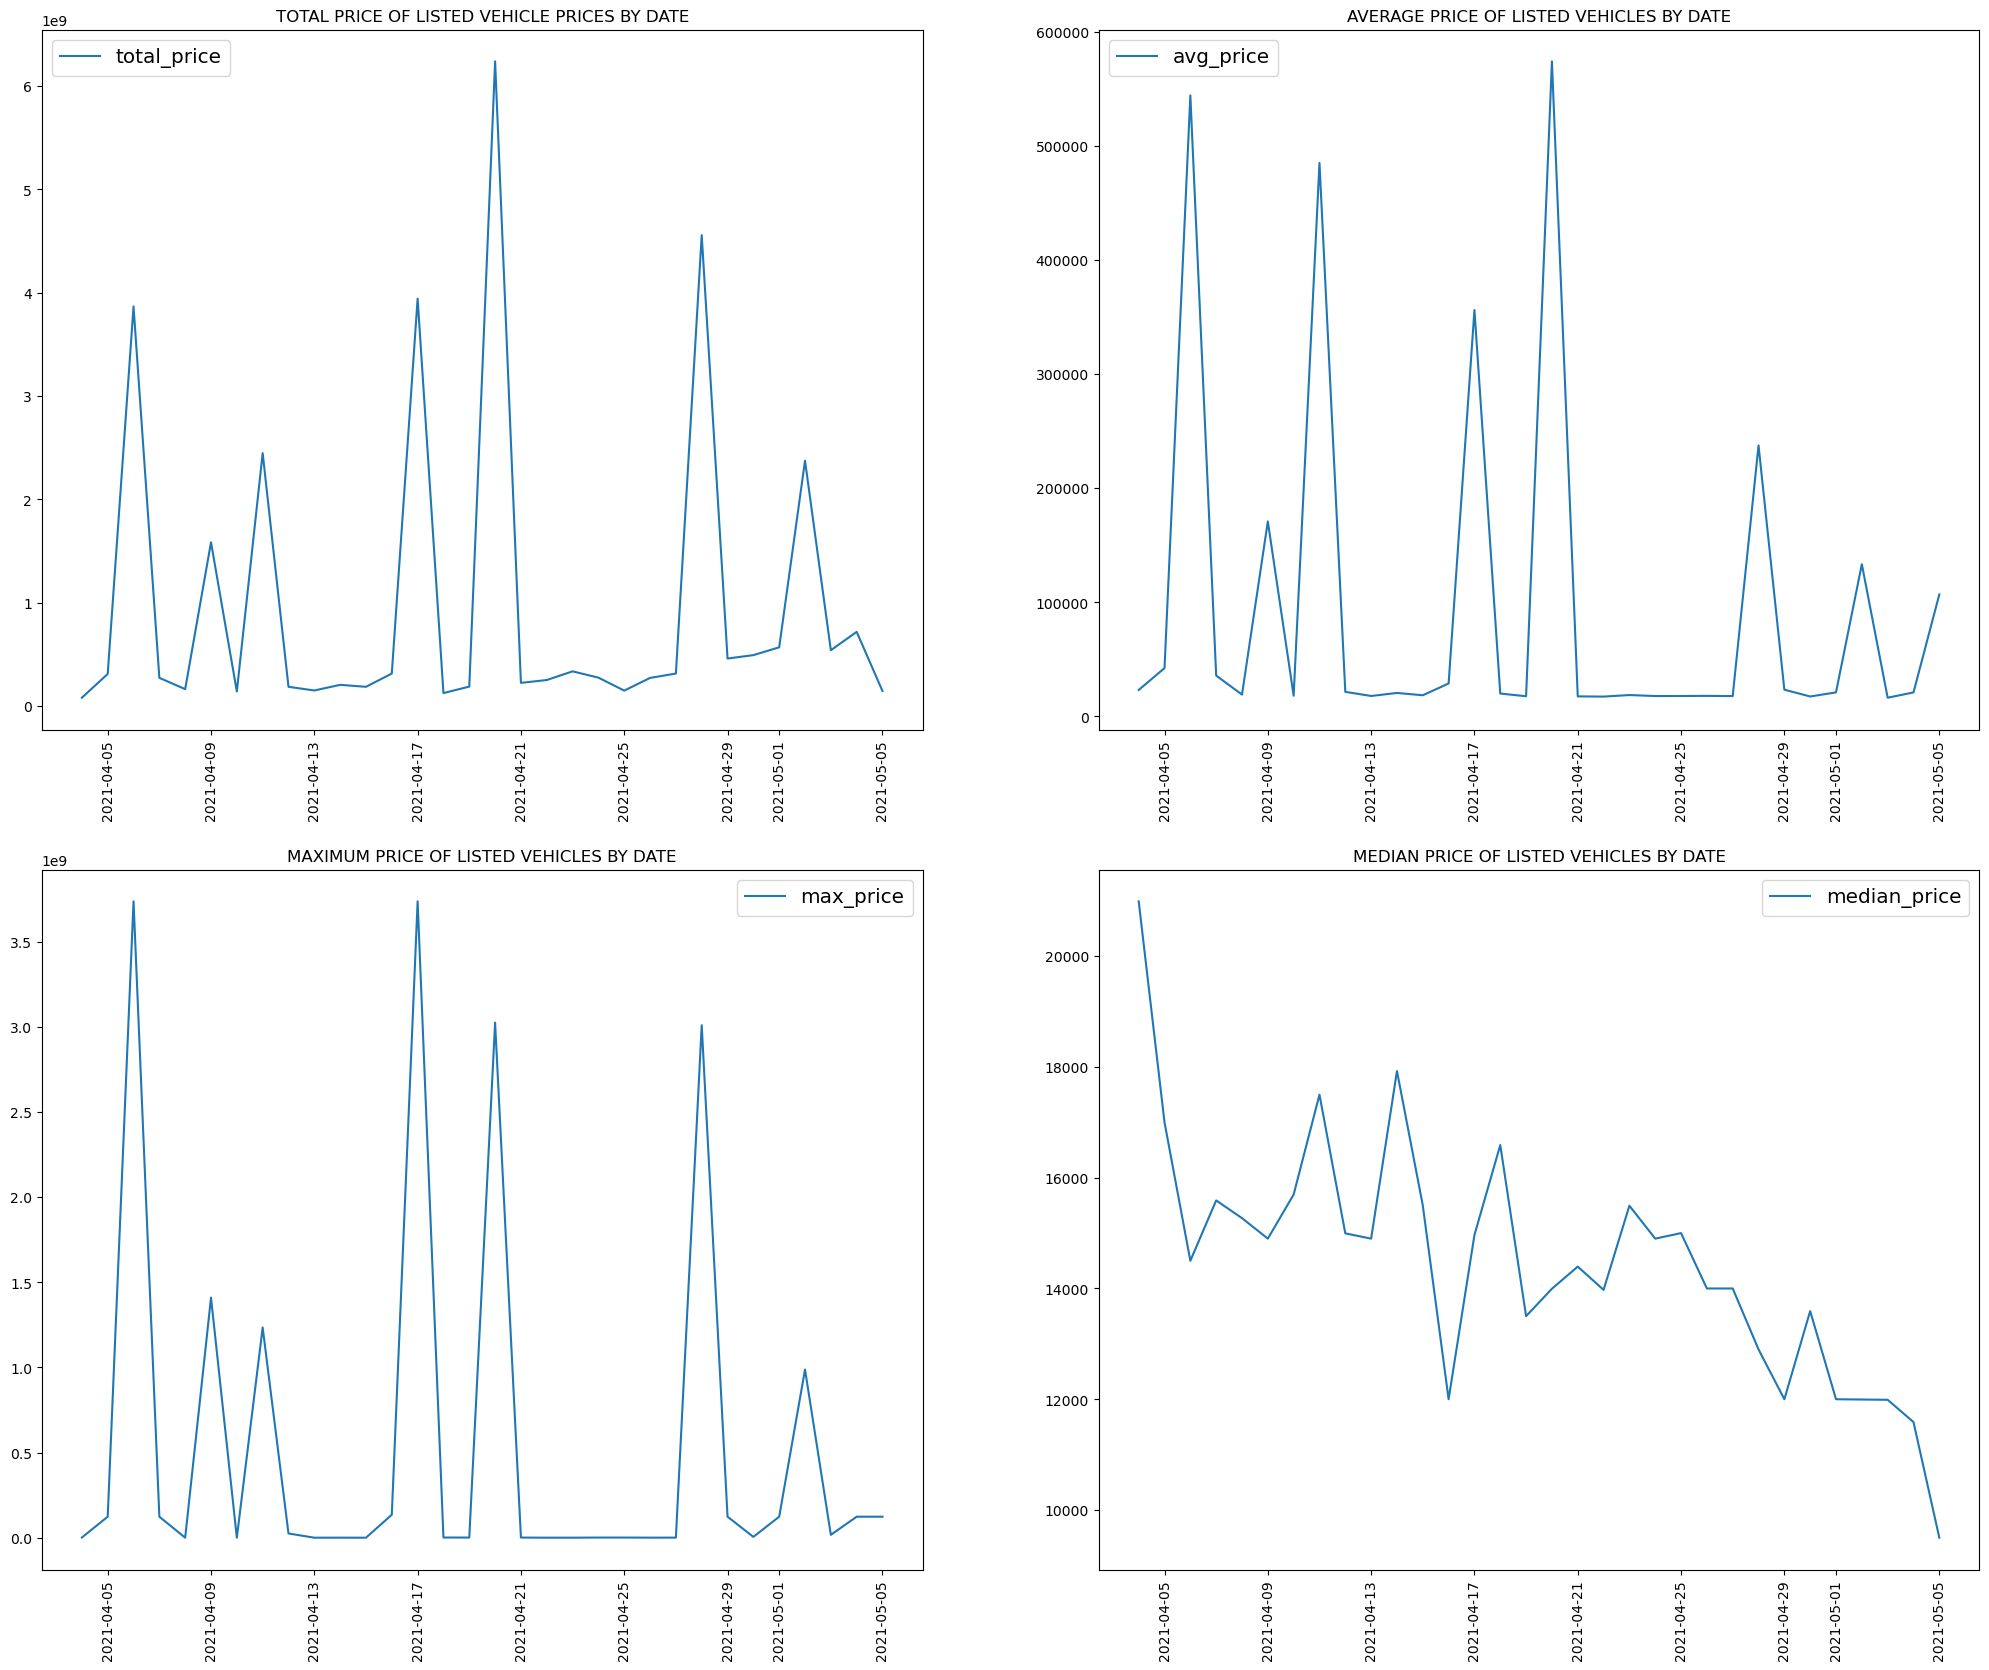

In [41]:
figure_5, axis_5 = plt.subplots(2, 2, figsize=(25, 20)) 

axis_5[0, 0].plot(total_price_overtime) 
axis_5[0, 0].set_title("Total Price of Listed Vehicle Prices by Date".upper()) 
axis_5[0, 0].tick_params(axis='x', labelrotation=90, which='major')
axis_5[0, 0].legend(labels=total_price_overtime, loc="upper left", fontsize="x-large")

axis_5[0, 1].plot(avg_price_overtime) 
axis_5[0, 1].set_title("Average Price of Listed Vehicles by Date".upper()) 
axis_5[0, 1].tick_params(axis='x', labelrotation=90, which='major')
axis_5[0, 1].legend(labels=avg_price_overtime, loc="upper left", fontsize="x-large")

axis_5[1, 0].plot(max_price_overtime) 
axis_5[1, 0].set_title("Maximum Price of Listed Vehicles by Date".upper()) 
axis_5[1, 0].tick_params(axis='x', labelrotation=90, which='major')
axis_5[1, 0].legend(labels=max_price_overtime, loc="upper right", fontsize="x-large")

axis_5[1, 1].plot(median_price_overtime) 
axis_5[1, 1].set_title("Median Price of Listed Vehicles by Date".upper()) 
axis_5[1, 1].tick_params(axis='x', labelrotation=90, which='major')
axis_5[1, 1].legend(labels=median_price_overtime, loc="upper right", fontsize="x-large")
plt.show()

The above charts show a fluctuation in the total price of vehicles sold overtime, reaching a peak of `6238564895` on `2021-04-20` and drop to the least total listings price of `81315668` on `2021-04-04`.  
The average prices over time recorded `2021-05-03` as the date with the least average price of listed vehicles having merely `16334.612036` in average compared to `2021-04-20` which recorded `574030.630751` in average listing prices.  
`2021-04-06` and `2021-04-17` recorded the most expensive vehicle listings of `3736928711` each, while `2021-04-15` recorded the cheapest vehicle listing of just `123456`.  
Finally the median prices of vehicle listings showed a steady decline overtime dropping from over `20,000` on `2021-04-04` to less than `10,000` by `2021-05-05`

In [50]:
clean_df['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
orlando                    2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64